# Predicting Salaries on the basis of Years of Experience using Simple Linear Regression

### __Made by [Ahmad Shafique](https://www.linkedin.com/in/ahmadshafique443)__ 

## Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Loading Salary Dataset

In [2]:
salary_data = pd.read_csv('Salary Data.csv')
salary_data.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


## Exploring Dataset

In [3]:
salary_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


In [4]:
salary_data.shape

(375, 6)

In [5]:
salary_data.describe()

,Age,Years of Experience,Salary
count,373.000000,373.000000,373.000000
mean,37.431635,10.030831,100577.345845
std,7.069073,6.557007,48240.013482
min,23.000000,0.000000,350.000000
25%,31.000000,4.000000,55000.000000
50%,36.000000,9.000000,95000.000000
75%,44.000000,15.000000,140000.000000
max,53.000000,25.000000,250000.000000


## Checking and dropping rows having null values

In [6]:
salary_data.isnull().sum()

Age                    2
Gender                 2
Education Level        2
Job Title              2
Years of Experience    2
Salary                 2
dtype: int64

In [7]:
salary_data[salary_data['Age'].isna()]

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
172,NaN,NaN,NaN,NaN,NaN,NaN
260,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
salary_data.dropna(how='all', inplace=True)

In [9]:
salary_data.isnull().sum()

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64

## Time to do some visualization to understand patterns in the data

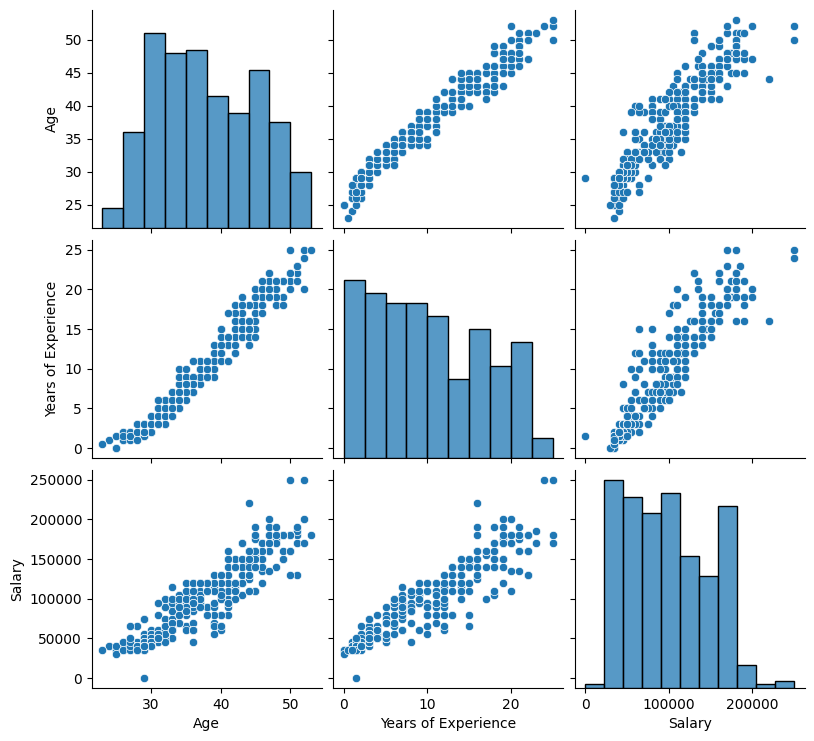

In [10]:
sns.pairplot(salary_data, height=2.5, aspect=1.1)
plt.show()

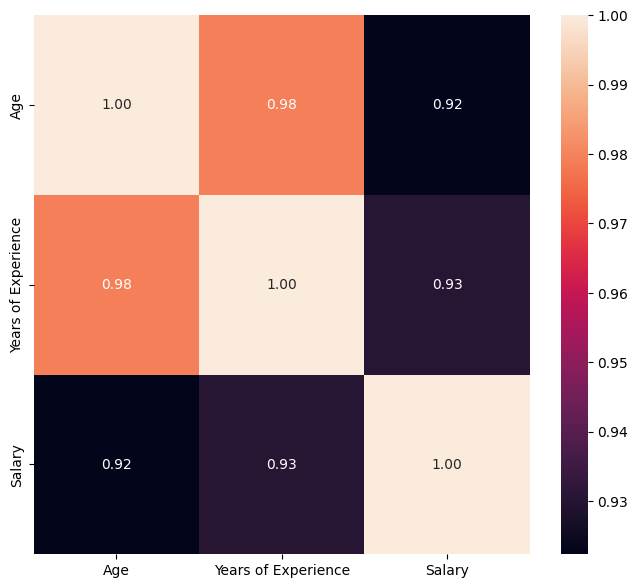

In [11]:
plt.figure(figsize=(8,7))
sns.heatmap(salary_data.corr(), annot=True, fmt='.2f')
plt.show()

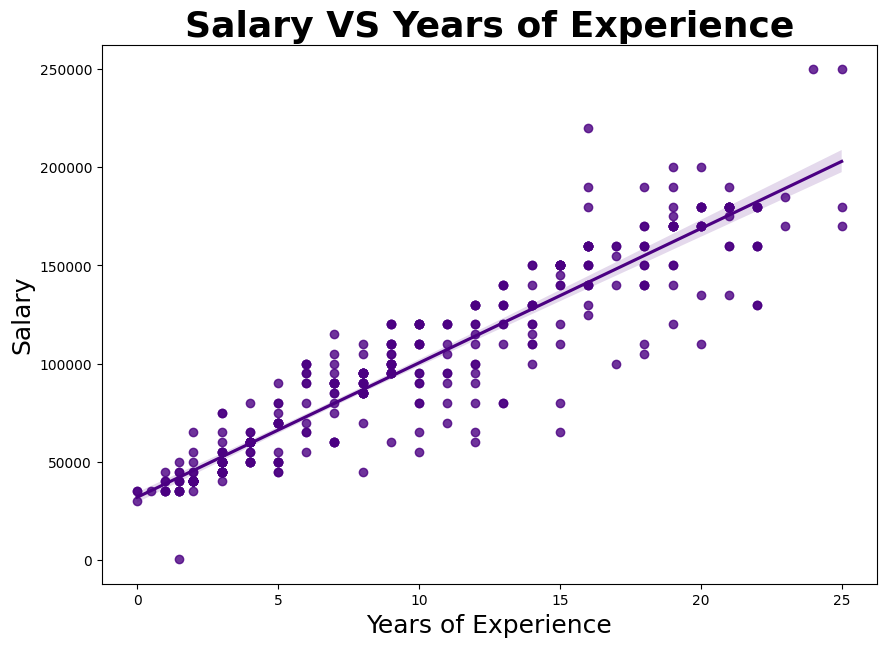

In [12]:
plt.figure(figsize=(10,7))
sns.regplot(data=salary_data, x='Years of Experience', y='Salary', color='indigo')
plt.xlabel('Years of Experience', fontdict={'fontsize':18})
plt.ylabel('Salary', fontdict={'fontsize':18})
plt.title('Salary VS Years of Experience', fontdict={'fontweight':'bold', 'fontsize':26})
plt.show()

## Checking if the features have outliers

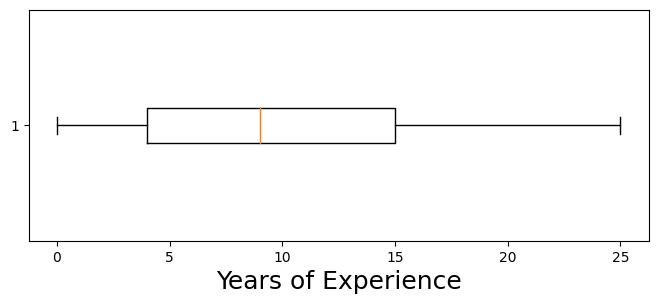

In [13]:
plt.figure(figsize=(8,3))
plt.boxplot(x=salary_data['Years of Experience'], vert=False)
plt.xlabel('Years of Experience', fontdict={'fontsize':18})
plt.show()

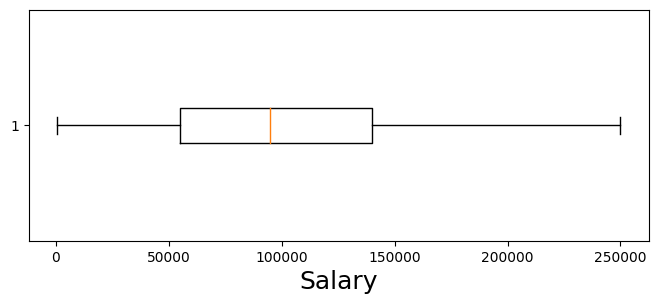

In [14]:
plt.figure(figsize=(8,3))
plt.boxplot(x=salary_data['Salary'], vert=False)
plt.xlabel('Salary', fontdict={'fontsize':18})
plt.show()

## Choosing Independent and dependent features

In [15]:
X = salary_data['Years of Experience']
y = salary_data['Salary']

## Splitting the dataset into traing and testing sets

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=22)

In [17]:
X_train = X_train.to_numpy().reshape(-1, 1)
print(X_train.shape)
X_test = X_test.to_numpy().reshape(-1, 1)
print(X_test.shape)

(298, 1)
(75, 1)


## Training Simple Linear regression model on training data

In [18]:
from sklearn.linear_model import LinearRegression
l_reg = LinearRegression()
model = l_reg.fit(X_train, y_train)

## Interpreting the Simple Linear Regression model

In [19]:
print('Intercept is', round(l_reg.intercept_))
print('Slope is', round(int(l_reg.coef_)))

Intercept is 31789
Slope is 6777


### this shows that avg salary with 0 years of experience is 31789 and as we increase the years of experience, there is an increase of 6777 in salary per year

## predicting salaries of Test set

In [20]:
y_pred = model.predict(X_test)

## Evaluating the accuracy of our model using various metrics

In [21]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
r_squared = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
print('R-squared value :', round(r_squared, 4))
print('Mean square error is :', round(mse))
print('Root mean square error is :', round(rmse))
print('Mean absolute error is :', round(mae))


R-squared value : 0.8989
Mean square error is : 210051347
Root mean square error is : 14493
Mean absolute error is : 11133


## Visual representation of actual salaries and our predicted salaries

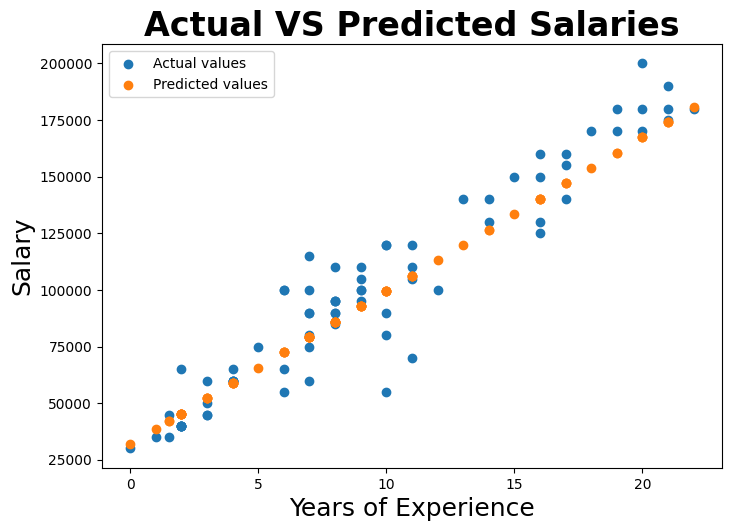

In [22]:
plt.figure(figsize=(8,5.5))
plt.scatter(X_test, y_test, label='Actual values')
plt.scatter(X_test, y_pred, label='Predicted values')
plt.legend()
plt.xlabel('Years of Experience', fontdict={'fontsize':18})
plt.ylabel('Salary', fontdict={'fontsize':18})
plt.title('Actual VS Predicted Salaries', fontdict={'fontweight':'bold', 'fontsize':24})
plt.show()